In [1]:
import pandas as pd
import numpy as np

from constants import numeric_columns as num_cols


df = pd.read_csv('dm1_dataset_2425_imdb/train.csv')

In [2]:
# possible useful columns for this task:
# rating, startYear, runtimeMinutes, awardWins, numVotes,
# totalImages, totalVideos, totalCredits, criticReviewsTotal,
# awardNominationsExcludeWins, canHaveEpisodes (?), isAdult,
# numRegions, userReviewsTotal, ratingCount,
# genres (as 1henc or as a count?)
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres'],
      dtype='object')

In [3]:
df['rating'].unique()

array(['(7, 8]', '(5, 6]', '(8, 9]', '(6, 7]', '(2, 3]', '(4, 5]',
       '(9, 10]', '(3, 4]', '(0, 1]', '(1, 2]'], dtype=object)

In [4]:
# swaps the rating column to contain only the integer values of the higher bounds
df['rating'] = df['rating'].str.extract(
        r",\s*(\d+)\]"
    ).astype(int)

df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,6,1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,6,1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,6,2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,8,2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,6,1942,\N,\N,0.0,73,1,10,4,...,movie,0,False,True,0,14,4,73,['FR'],Comedy
16427,Haar Jeet,5,1990,\N,\N,0.0,15,1,10,2,...,movie,0,False,True,0,1,1,15,['IN'],"Action,Drama,Thriller"
16428,Kotigobba 3,6,2021,\N,140,0.0,2560,1,10,39,...,movie,5,False,True,0,5,49,2560,['IN'],"Action,Drama,Romance"
16429,Ator l'invincibile,4,1982,\N,\N,0.0,3011,1,10,52,...,movie,0,False,True,0,26,58,3012,['IT'],"Action,Adventure,Fantasy"


In [5]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# train_df[num_cols] = pd.to_numeric(train_df[num_cols], errors='coerce')

df.loc[df['genres'] == r'\N', 'genres'] = np.nan
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,6,1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,6,1942,NaN,NaN,0.0,73,1,10,4,...,movie,0,False,True,0,14,4,73,['FR'],Comedy
16427,Haar Jeet,5,1990,NaN,NaN,0.0,15,1,10,2,...,movie,0,False,True,0,1,1,15,['IN'],"Action,Drama,Thriller"
16428,Kotigobba 3,6,2021,NaN,140.0,0.0,2560,1,10,39,...,movie,5,False,True,0,5,49,2560,['IN'],"Action,Drama,Romance"
16429,Ator l'invincibile,4,1982,NaN,NaN,0.0,3011,1,10,52,...,movie,0,False,True,0,26,58,3012,['IT'],"Action,Adventure,Fantasy"


In [6]:
df['awardWins'].fillna(0, inplace=True)
df['totalNominations'] = df['awardWins'] + df['awardNominationsExcludeWins']

/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_10055/1033987403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['awardWins'].fillna(0, inplace=True)


In [7]:
df.groupby('totalNominations').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
totalNominations,,,,,,,,,,,,,,,,,,,,,
0.0,13692,13692,13692,581,9431,13692,13692,13692,13692,13692,...,13692,13692,13692,13692,13692,13692,13692,13692,13692,13338
1.0,1016,1016,1016,62,787,1016,1016,1016,1016,1016,...,1016,1016,1016,1016,1016,1016,1016,1016,1016,996
2.0,504,504,504,43,400,504,504,504,504,504,...,504,504,504,504,504,504,504,504,504,501
3.0,252,252,252,24,203,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252
4.0,213,213,213,21,164,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
160.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
170.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
df.loc[df['runtimeMinutes'].isna()].groupby('titleType').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,totalNominations
titleType,,,,,,,,,,,,,,,,,,,,,
movie,1225,1225,1225,0,0,1225,1225,1225,1225,1225,...,1225,1225,1225,1225,1225,1225,1225,1225,1120,1225
short,582,582,582,0,0,582,582,582,582,582,...,582,582,582,582,582,582,582,582,582,582
tvEpisode,1469,1469,1469,0,0,1469,1469,1469,1469,1469,...,1469,1469,1469,1469,1469,1469,1469,1469,1468,1469
tvMiniSeries,120,120,120,60,0,120,120,120,120,120,...,120,120,120,120,120,120,120,120,109,120
tvMovie,212,212,212,0,0,212,212,212,212,212,...,212,212,212,212,212,212,212,212,200,212
tvSeries,676,676,676,279,0,676,676,676,676,676,...,676,676,676,676,676,676,676,676,641,676
tvShort,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
tvSpecial,72,72,72,0,0,72,72,72,72,72,...,72,72,72,72,72,72,72,72,60,72
video,238,238,238,0,0,238,238,238,238,238,...,238,238,238,238,238,238,238,238,228,238


In [9]:
df.groupby('titleType').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,totalNominations
titleType,,,,,,,,,,,,,,,,,,,,,
movie,5535,5535,5535,0,4310,5535,5535,5535,5535,5535,...,5535,5535,5535,5535,5535,5535,5535,5535,5305,5535
short,2474,2474,2474,0,1892,2474,2474,2474,2474,2474,...,2474,2474,2474,2474,2474,2474,2474,2474,2474,2474
tvEpisode,4698,4698,4698,0,3229,4698,4698,4698,4698,4698,...,4698,4698,4698,4698,4698,4698,4698,4698,4692,4698
tvMiniSeries,224,224,224,121,104,224,224,224,224,224,...,224,224,224,224,224,224,224,224,209,224
tvMovie,868,868,868,0,656,868,868,868,868,868,...,868,868,868,868,868,868,868,868,843,868
tvSeries,1375,1375,1375,693,699,1375,1375,1375,1375,1375,...,1375,1375,1375,1375,1375,1375,1375,1375,1322,1375
tvShort,40,40,40,0,39,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
tvSpecial,166,166,166,0,94,166,166,166,166,166,...,166,166,166,166,166,166,166,166,148,166
video,792,792,792,0,554,792,792,792,792,792,...,792,792,792,792,792,792,792,792,769,792


In [10]:
df.groupby('runtimeMinutes').count()

,originalTitle,rating,startYear,endYear,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,totalNominations
runtimeMinutes,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.0,81,81,81,0,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
2.0,56,56,56,0,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
3.0,92,92,92,1,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
4.0,87,87,87,2,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
570.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
600.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [11]:
df.groupby('criticReviewsTotal').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,totalNominations
criticReviewsTotal,,,,,,,,,,,,,,,,,,,,,
0,11439,11439,11439,614,7539,11439,11439,11439,11439,11439,...,11439,11439,11439,11439,11439,11439,11439,11439,11087,11439
1,1923,1923,1923,83,1501,1923,1923,1923,1923,1923,...,1923,1923,1923,1923,1923,1923,1923,1923,1901,1923
2,780,780,780,30,640,780,780,780,780,780,...,780,780,780,780,780,780,780,780,774,780
3,427,427,427,12,352,427,427,427,427,427,...,427,427,427,427,427,427,427,427,426,427
4,296,296,296,16,242,296,296,296,296,296,...,296,296,296,296,296,296,296,296,296,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
368,2,2,2,0,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
418,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
df.groupby('userReviewsTotal').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,ratingCount,countryOfOrigin,genres,totalNominations
userReviewsTotal,,,,,,,,,,,,,,,,,,,,,
0,9229,9229,9229,391,5957,9229,9229,9229,9229,9229,...,9229,9229,9229,9229,9229,9229,9229,9229,8901,9229
1,2514,2514,2514,105,1837,2514,2514,2514,2514,2514,...,2514,2514,2514,2514,2514,2514,2514,2514,2476,2514
2,1138,1138,1138,52,894,1138,1138,1138,1138,1138,...,1138,1138,1138,1138,1138,1138,1138,1138,1130,1138
3,638,638,638,36,526,638,638,638,638,638,...,638,638,638,638,638,638,638,638,635,638
4,411,411,411,27,325,411,411,411,411,411,...,411,411,411,411,411,411,411,411,409,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1418,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1604,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
df.loc[(df['userReviewsTotal'] + df['criticReviewsTotal']) == df['ratingCount']]

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,totalNominations
3403,Episode #1.9,9,2023,NaN,32.0,0.0,6,1,10,10,...,0,False,True,0,7,0,6,['AU'],Drama,0.0


In [14]:
df.groupby('totalVideos').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,totalNominations
totalVideos,,,,,,,,,,,,,,,,,,,,,
0,14821,14821,14821,687,10324,14821,14821,14821,14821,14821,...,14821,14821,14821,14821,14821,14821,14821,14821,14449,14821
1,1155,1155,1155,65,900,1155,1155,1155,1155,1155,...,1155,1155,1155,1155,1155,1155,1155,1155,1151,1155
2,205,205,205,30,159,205,205,205,205,205,...,205,205,205,205,205,205,205,205,203,205
3,78,78,78,5,59,78,78,78,78,78,...,78,78,78,78,78,78,78,78,76,78
4,35,35,35,4,25,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
5,32,32,32,2,27,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
6,14,14,14,1,10,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
7,7,7,7,0,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
8,5,5,5,0,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,3,5


In [15]:
# "startYear", "awardWins", "numVotes", "totalImages", "totalVideos",
# "totalCredits", "criticReviewsTotal", "awardNominationsExcludeWins",
# "numRegions", "userReviewsTotal", "fill_runtimeMinutes"

numeric_cols = [
    'rating', 'startYear',
    'numVotes', 'totalImages', 'totalCredits',
    'numRegions', 'ratingCount',
    

    # these are made out of mostly 0s
    # 'awardNominationsExcludeWins', 'awardWins',
    # 'totalNominations', 'runtimeMinutes',
    # 'userReviewsTotal', 'criticReviewsTotal',
    # 'totalVideos',

    # booleans
    # 'canHaveEpisodes', 'isAdult',

    # cut
     
]


to_log = [
    'numVotes', 'totalImages', 'totalCredits',
    'numRegions', 'ratingCount',
    

    # these are made out of mostly 0s
    # 'awardNominationsExcludeWins', 'awardWins',
    # 'totalNominations', 'runtimeMinutes',
    # 'userReviewsTotal', 'criticReviewsTotal',
    # 'totalVideos',

    # booleans
    # 'canHaveEpisodes', 'isAdult',

    # cut
    # 'rating', 'startYear',
]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.patches as mpatches


# Select numerical features
# numeric_cols = df.select_dtypes(include=['number']).columns

# decision to drop na: first try, the classes mantain decent
# representation while not having to replace na, possibly inserting
# errors
data = df[numeric_cols].dropna()

# transformation of some attributes -> log
# data['runtimeMinutes'] = np.log(data['runtimeMinutes'] + 1)
for feature in to_log:
    data[feature] = np.log(data[feature] + 1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Agglomerative Clustering
n_clusters = 4  # Adjust based on your dataset
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data['cluster'] = clustering.fit_predict(data_scaled)

# Plot clusters (PCA for visualization if data is high-dimensional)

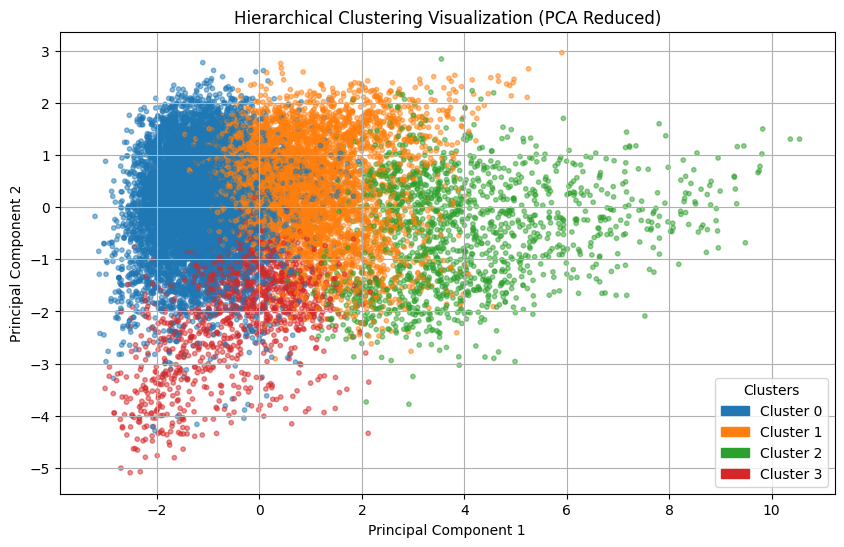

In [154]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
data_pca = pca.fit_transform(data_scaled)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [
#     '#1f77b4',  # tab:blue -> #abc -> #aabbcc
#     '#ff7f0e',  # tab:orange -> #fb1 -> #ffbb11
#     '#2ca02c',  # tab:green -> #28a -> #22aa22
#     '#d63928',  # tab:red -> #f83 -> #ff8833
#     '#9467bd',  # tab:purple -> #936 -> #993366
#     '#8c564b',  # tab:brown -> #975 -> #997755
#     '#e377c2',  # tab:pink -> #e37 -> #ee77cc
#     '#7f7f7f',  # tab:gray -> #777 -> #777777
#     '#bdbd22',  # tab:olive -> #bb2 -> #bbbb22
#     '#17becf'   # tab:cyan -> #17c -> #11cccc
# ]

color_mapping = {i: colors[i] for i in range(len(colors))}

scatter_colors = [color_mapping[label] for label in data['cluster']]


plt.figure(figsize=(10, 6))
plt.scatter(
    data_pca[:, 0], data_pca[:, 1], c=scatter_colors,
    alpha=0.5, s=10
)
plt.grid()
plt.title("Hierarchical Clustering Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.colorbar(label="Cluster Label")
unique_clusters = np.unique(data['cluster'])
legend_patches = [
    mpatches.Patch(color=colors[i], label=f"Cluster {unique_clusters[i]}")
    for i in range(len(unique_clusters))
]
plt.legend(handles=legend_patches, title="Clusters", loc="best")
plt.show()

In [146]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')

In [147]:
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [163]:
def link_color_func(k):
    # If k is less than the number of leaves, it corresponds to a data point (leaf)
    if k < len(data):
        return color_mapping[data['cluster'][k]]  # Color by the cluster of the data point
    else:
        # For internal nodes, find the cluster labels of the two merged nodes
        left_idx, _ = linked[k - len(data), 0:2]  # Get the indices of the left and right branches
        # left_label = data['cluster'][int(left_idx)]  # Get the cluster of the left node
        
        return link_color_func(int(left_idx))


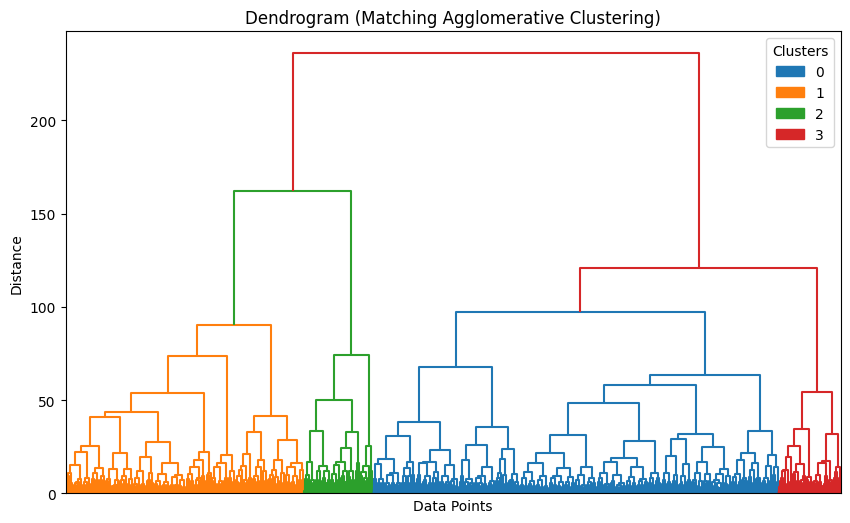

In [164]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendro = dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    no_labels=True,
    color_threshold=None,  # Prevent automatic coloring
    link_color_func=link_color_func
)

# Create legend with AgglomerativeClustering colors
legend_patches = [
    mpatches.Patch(color=color_mapping[label], label=f"{label}")
    for label in np.unique(data['cluster'])
]

plt.legend(handles=legend_patches, title="Clusters", loc="best")

# Labels and title
plt.title("Dendrogram (Matching Agglomerative Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Distance")

plt.show()

In [98]:
color_mapping[data['cluster'][200]]

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

In [74]:
print(color_mapping)

{0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 1: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)}


In [60]:
data.columns

Index(['rating', 'startYear', 'numVotes', 'totalImages', 'totalCredits',
       'numRegions', 'ratingCount', 'cluster'],
      dtype='object')

In [28]:
pca.explained_variance_ratio_

array([4.71120204e-01, 1.87733169e-01, 1.21469285e-01, 8.12013614e-02,
       7.31049072e-02, 6.53688122e-02, 2.26179850e-06])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

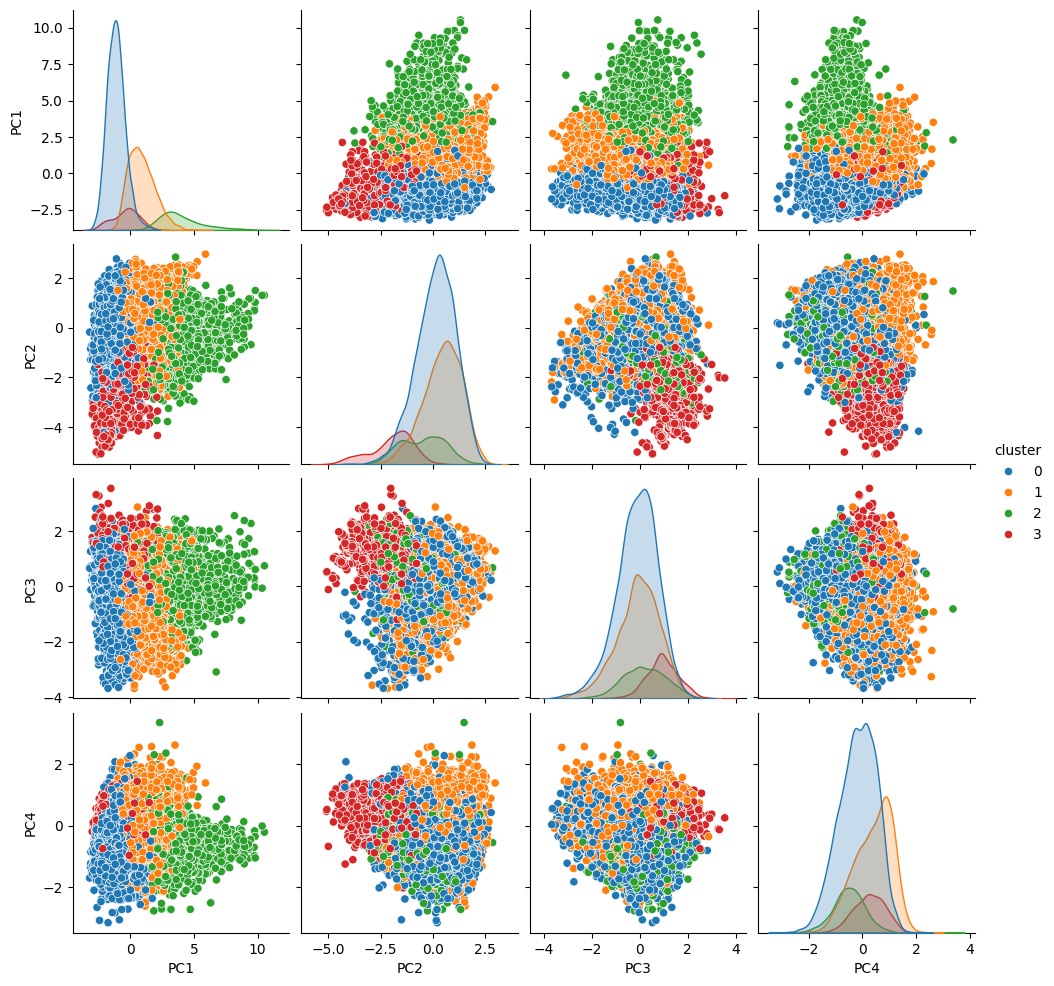

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_hierarchical(data_pca):
    # Create a DataFrame with principal components
    pca_columns = [f"PC{i+1}" for i in range(len(data_pca[0]))]
    pca_df = pd.DataFrame(data_pca, columns=pca_columns)
    
    pca_df['cluster'] = data['cluster']
    
    # Visualize with Seaborn pairplot


    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", "PC3", "PC4"],
        hue="cluster",
        diag_kind="kde",
        palette="tab10"
    )
    
    plt.show()

    plt.show()

# Assuming the DataFrame is called pp_train
plot_pca_hierarchical(data_pca)

In [69]:
data.groupby('cluster').count()

,rating,startYear,numVotes,totalImages,totalCredits,numRegions,ratingCount
cluster,,,,,,,
0,8590,8590,8590,8590,8590,8590,8590
1,5061,5061,5061,5061,5061,5061,5061
2,1467,1467,1467,1467,1467,1467,1467
3,1313,1313,1313,1313,1313,1313,1313
